# Predict Restaurant Ratings

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [41]:
df=pd.read_csv("Dataset .csv")

In [42]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [43]:
df[df["Rating text"] == 'Poor']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
312,17374978,Troll Tavern,216,Gainesville,"8590 N Main St Ste B, Helen, GA 30545",Helen,"Helen, Gainesville",-83.733400,34.702100,"Burger, German, Sandwich",...,Dollar($),No,No,No,No,2,2.2,Red,Poor,108
344,17482142,Triangle Restaurant,216,Mc Millan,"21053 State Hwy M28, Mc Millan, MI 49853",Mc Millan,"Mc Millan, Mc Millan",-85.736300,46.371800,"Breakfast, Burger",...,Dollar($),No,No,No,No,1,2.4,Red,Poor,17
348,16613059,Poets Cafe,14,Montville,"167 Main St, Montville, QLD",Montville,"Montville, Montville",152.893735,-26.690462,"Coffee and Tea, Modern Australian",...,Dollar($),No,No,No,No,3,2.4,Red,Poor,193
613,5600961,Pizza Hut,214,Sharjah,"Next to Safeer Mall, Al Nahda, Sharjah",Al Nahda,"Al Nahda, Sharjah",55.374543,25.305640,"Fast Food, Pizza",...,Emirati Diram(AED),No,No,No,No,3,2.4,Red,Poor,154
890,311051,KFC,1,Faridabad,"Shops 21-22, 2nd Floor, Crown Interiorz Mall, ...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307060,28.469807,"American, Fast Food, Burger",...,Indian Rupees(Rs.),No,Yes,No,No,2,2.1,Red,Poor,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2979,Chopaal,1,Noida,"A-2, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325308,28.567150,"Chinese, North Indian, South Indian, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,2.0,Red,Poor,161
9105,3237,Club Ice Cube,1,Noida,"313, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326475,28.568067,"North Indian, Continental, Chinese",...,Indian Rupees(Rs.),Yes,No,No,No,4,2.0,Red,Poor,230
9106,2025,Moti Mahal Delux Tandoori Trail,1,Noida,"Food Court, The Great India Place Mall, Sector...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325445,28.567040,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,2.0,Red,Poor,108
9306,7001208,De Fontein Belgian Beer Cafe,148,Auckland,"75-79 Tamaki Drive, Mission Bay, Auckland",Mission Bay,"Mission Bay, Auckland",174.832089,-36.848315,European,...,NewZealand($),No,No,No,No,4,2.3,Red,Poor,402


# Visualizations

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

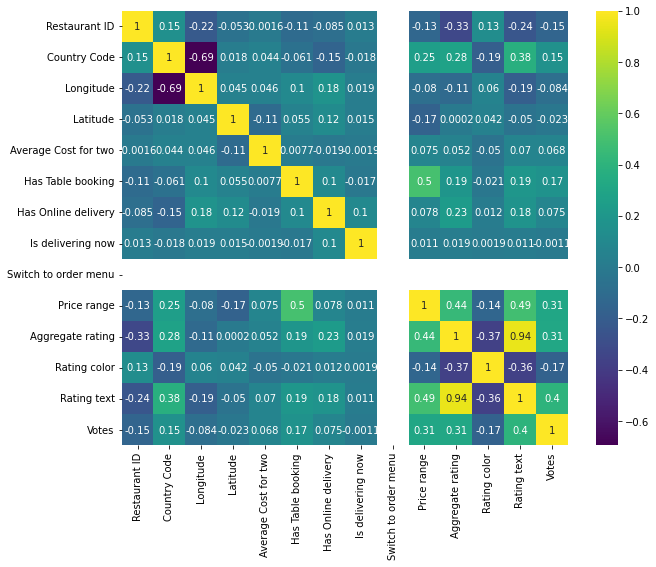

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()


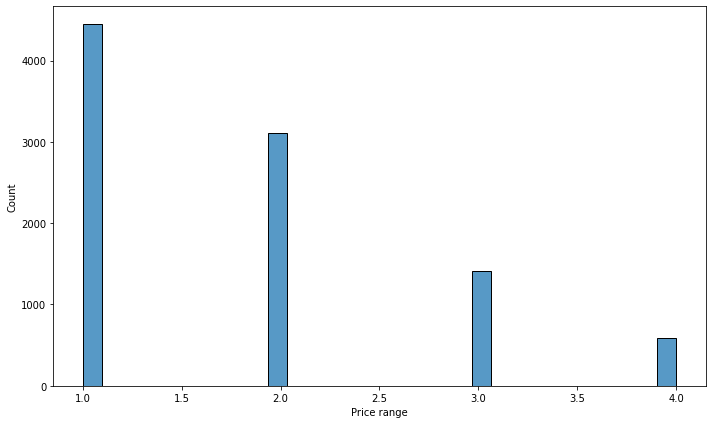

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price range'])
plt.tight_layout()  
plt.show()

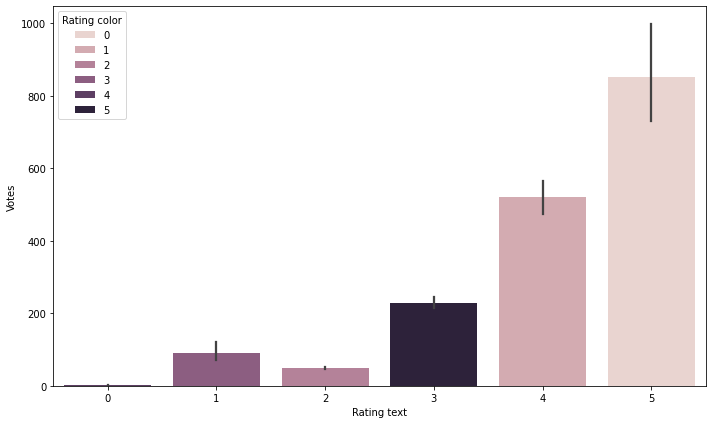

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Rating text"],y=df["Votes"],hue =df["Rating color"])
plt.tight_layout()  
plt.show()

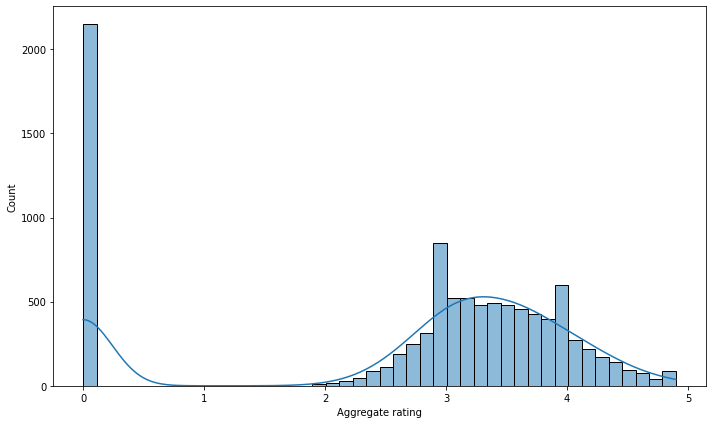

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Aggregate rating"],kde=True)
plt.tight_layout()  
plt.show()

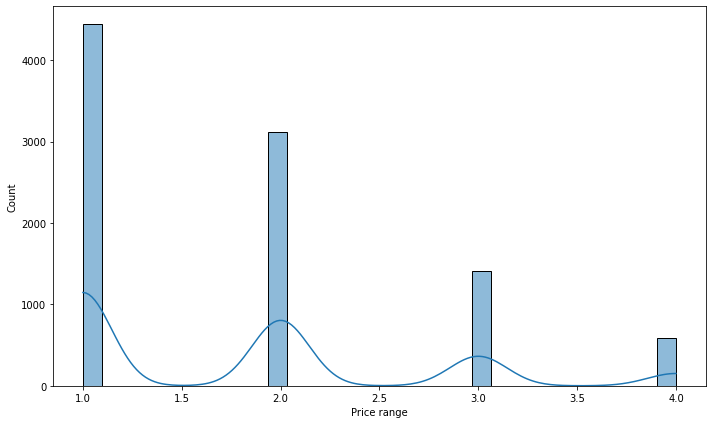

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Price range"],kde=True)
plt.tight_layout()  
plt.show()

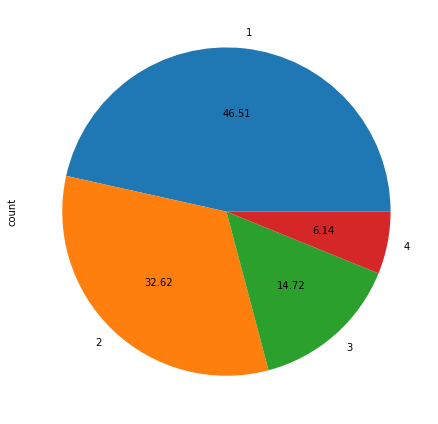

In [78]:
plt.figure(figsize=(10, 6))
df['Price range'].value_counts().plot(kind='pie', autopct = '%.2f')
plt.tight_layout()  
plt.show()

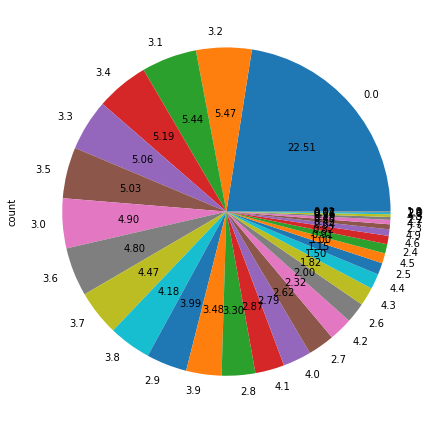

In [79]:
plt.figure(figsize=(10, 6))
df['Aggregate rating'].value_counts().plot(kind='pie', autopct = '%.2f')
plt.tight_layout()  
plt.show()

In [47]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [48]:
df['Aggregate rating']

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [49]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Dropping the null values

In [50]:
df.dropna(inplace=True)

In [51]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [52]:
label_encoder=LabelEncoder()
scaler=StandardScaler()

In [53]:
rating_mapping = {
    'Not rated': 0,
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

In [54]:
df['Rating text']=df['Rating text'].map(rating_mapping)

Here Mapping the rating text as this is an ordinal feature and can be ranked so ranking as per text 

In [55]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,5,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,5,591


In [56]:
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])


# Divinding the dataset into dependent and independent feature

In [57]:
X=df.drop('Aggregate rating',axis=1)
y=df['Aggregate rating']

In [58]:
X=df.drop(columns=['Restaurant ID', 'Restaurant Name','City', 'Address',
       'Locality', 'Locality Verbose','Cuisines','Currency','Longitude','Latitude','Aggregate rating'])

In [59]:
X

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
0,162,1100,1,0,0,0,3,0,5,314
1,162,1200,1,0,0,0,3,0,5,591
2,162,4000,1,0,0,0,4,1,4,270
3,162,1500,0,0,0,0,4,0,5,365
4,162,1500,1,0,0,0,4,0,5,229
...,...,...,...,...,...,...,...,...,...,...
9546,208,80,0,0,0,0,3,1,4,788
9547,208,105,0,0,0,0,3,1,4,1034
9548,208,170,0,0,0,0,4,5,3,661
9549,208,120,0,0,0,0,4,1,4,901


In [60]:
y=df["Aggregate rating"]

In [61]:
df['Rating color'].value_counts()

Rating color
2    3734
4    2148
5    2096
1    1078
0     300
3     186
Name: count, dtype: int64

In [22]:
df['Rating text'].value_counts()

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

# Train test split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=40)

In [63]:
X_train

,Country Code,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Rating text,Votes
7235,1,200,0,0,0,0,1,2,2,8
4050,1,100,0,0,0,0,1,2,2,16
6597,1,900,0,1,0,0,2,2,2,7
2351,1,650,0,1,0,0,2,1,4,198
8405,1,1200,1,0,0,0,3,2,2,446
...,...,...,...,...,...,...,...,...,...,...
7848,1,800,1,1,0,0,2,2,2,430
3612,1,200,0,0,0,0,1,2,2,4
5968,1,700,0,0,0,0,2,2,2,6
5435,1,2200,1,1,0,0,4,5,3,498


In [64]:
# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the scaler fitted on the training set
X_test_scaled = scaler.transform(X_test)


In [65]:
import numpy as np
X_train_preprocessed = np.concatenate([X_train, X_train_scaled], axis=1)

In [66]:
X_test_preprocessed = np.concatenate([X_test, X_test_scaled], axis=1)

In [67]:
X_train_preprocessed

array([[ 1.00000000e+00,  2.00000000e+02,  0.00000000e+00, ...,
        -6.34184037e-01, -5.93530268e-02, -3.32693021e-01],
       [ 1.00000000e+00,  1.00000000e+02,  0.00000000e+00, ...,
        -6.34184037e-01, -5.93530268e-02, -3.15422471e-01],
       [ 1.00000000e+00,  9.00000000e+02,  0.00000000e+00, ...,
        -6.34184037e-01, -5.93530268e-02, -3.34851840e-01],
       ...,
       [ 1.00000000e+00,  7.00000000e+02,  0.00000000e+00, ...,
        -6.34184037e-01, -5.93530268e-02, -3.37010659e-01],
       [ 1.00000000e+00,  2.20000000e+03,  1.00000000e+00, ...,
         1.37209904e+00,  6.71391228e-01,  7.25128195e-01],
       [ 1.00000000e+00,  3.50000000e+02,  0.00000000e+00, ...,
        -6.34184037e-01, -5.93530268e-02, -1.83734523e-01]])

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import  KNeighborsRegressor

In [71]:
###Multiple model training

models={ "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestReg":RandomForestRegressor(),
    "GradientBoostReg":GradientBoostingRegressor(),
    "AdaBoostReg":AdaBoostRegressor(),
    "XgboostReg":XGBRegressor(),
    "KNearReg":KNeighborsRegressor()}

model_list=[]
r2_mark=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_preprocessed,y_train)

    #make predictions
    y_pred=model.predict(X_test_preprocessed)

    mae, rmse, r2_squares=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Model Training Performance")
    print("MSE",mae)
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2_Score:",r2_squares*100)

    r2_mark.append(r2_squares)

    print("="*40)
    print("\n")


LinearRegression
Model Training Performance
MSE 0.38923756351772704
RMSE: 0.4629656488815749
MAE: 0.38923756351772704
R2_Score: 90.70355735006454


Lasso
Model Training Performance
MSE 0.7872191302592544
RMSE: 0.9619574887521576
MAE: 0.7872191302592544
R2_Score: 59.86428377092137


Ridge
Model Training Performance
MSE 0.3892576217041614
RMSE: 0.4629682104585932
MAE: 0.3892576217041614
R2_Score: 90.70345447582416


ElasticNet
Model Training Performance
MSE 0.6464987785710754
RMSE: 0.7901114222133117
MAE: 0.6464987785710754
R2_Score: 72.92328722968459


DecisionTreeRegressor
Model Training Performance
MSE 0.1484478210637498
RMSE: 0.23334637959980611
MAE: 0.1484478210637498
R2_Score: 97.63831815058306


RandomForestReg
Model Training Performance
MSE 0.12846892463272255
RMSE: 0.19288628554472365
MAE: 0.12846892463272255
R2_Score: 98.386303127448


GradientBoostReg
Model Training Performance
MSE 0.12118268342844656
RMSE: 0.17403414700041878
MAE: 0.12118268342844656
R2_Score: 98.686324212315

In [70]:
def evaluate_model(true,predicted):
    #square_error=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_squares=r2_score(true,predicted)
    return mae,rmse,r2_squares

# Conclusion

Here i have compared with all the regression models out of which the best model is Gradient boosting as its an ensemble technique but this is performing overall best. 

MSE of 0.14 of Decision Tree Regressor model indicates that model's predictions are very accurate & low errors.
R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable.
And according to the problem statemnt 
Decision Tree Regressor model is performing exceptionally well in comparison to linear regression on your test data.